**Library**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from collections import defaultdict
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**1. Load Dataset & EDA Singkat**

In [4]:
# baca, parse count_date sebagai datetime
df_counts = pd.read_csv(
    'dft_traffic_counts_raw_counts.csv',
    parse_dates=['count_date'],
    dayfirst=False
)
df_la      = pd.read_csv('local_authority_traffic.csv')
df_region  = pd.read_csv('region_traffic.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25444\1810612117.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_counts = pd.read_csv(


In [5]:
print(df_counts.columns.tolist())
print(df_la.columns.tolist())
print(df_region.columns.tolist())

['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour', 'region_id', 'region_name', 'local_authority_id', 'local_authority_name', 'road_name', 'road_type', 'start_junction_road_name', 'end_junction_road_name', 'easting', 'northing', 'latitude', 'longitude', 'link_length_km', 'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles']
['local_authority_id', 'local_authority_name', 'year', 'link_length_km', 'link_length_miles', 'cars_and_taxis', 'all_motor_vehicles']
['year', 'region_id', 'region_name', 'road_category_id', 'road_category_name', 'road_category_description', 'total_link_length_km', 'total_link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs', 'all_

In [6]:
print(df_counts.info())

print(df_counts.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337136 entries, 0 to 4337135
Data columns (total 32 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   count_point_id                int64         
 1   direction_of_travel           object        
 2   year                          int64         
 3   count_date                    datetime64[ns]
 4   hour                          int64         
 5   region_id                     int64         
 6   region_name                   object        
 7   local_authority_id            int64         
 8   local_authority_name          object        
 9   road_name                     object        
 10  road_type                     object        
 11  start_junction_road_name      object        
 12  end_junction_road_name        object        
 13  easting                       int64         
 14  northing                      int64         
 15  latitude                      fl

In [7]:
print(df_counts.describe())

       count_point_id          year                     count_date  \
count    4.337136e+06  4.337136e+06                        4337136   
mean     5.297199e+05  2.009614e+03  2010-02-11 14:39:09.878813184   
min      5.100000e+01  2.000000e+03            2000-03-17 00:00:00   
25%      4.620100e+04  2.005000e+03            2005-05-13 00:00:00   
50%      8.101500e+05  2.009000e+03            2009-06-26 00:00:00   
75%      9.457890e+05  2.015000e+03            2015-04-24 00:00:00   
max      9.999990e+05  2.019000e+03            2019-11-07 00:00:00   
std      4.460134e+05  5.777505e+00                            NaN   

               hour     region_id  local_authority_id       easting  \
count  4.337136e+06  4.337136e+06        4.337136e+06  4.337136e+06   
mean   1.249998e+01  6.158748e+00        1.025244e+02  4.325248e+05   
min    0.000000e+00  1.000000e+00        1.000000e+00  7.040600e+04   
25%    9.000000e+00  4.000000e+00        6.700000e+01  3.680000e+05   
50%    1.20000

In [8]:
print(df_counts.head())

   count_point_id direction_of_travel  year count_date  hour  region_id  \
0              52                   E  2019 2019-09-06    17          1   
1              52                   E  2019 2019-09-06    12          1   
2              52                   E  2019 2019-09-06    14          1   
3              52                   W  2019 2019-09-06    14          1   
4              52                   W  2019 2019-09-06    12          1   

  region_name  local_authority_id local_authority_name road_name  ...  \
0  South West                   1      Isles of Scilly     A3112  ...   
1  South West                   1      Isles of Scilly     A3112  ...   
2  South West                   1      Isles of Scilly     A3112  ...   
3  South West                   1      Isles of Scilly     A3112  ...   
4  South West                   1      Isles of Scilly     A3112  ...   

  buses_and_coaches lgvs hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0               0.0    8               0.0   

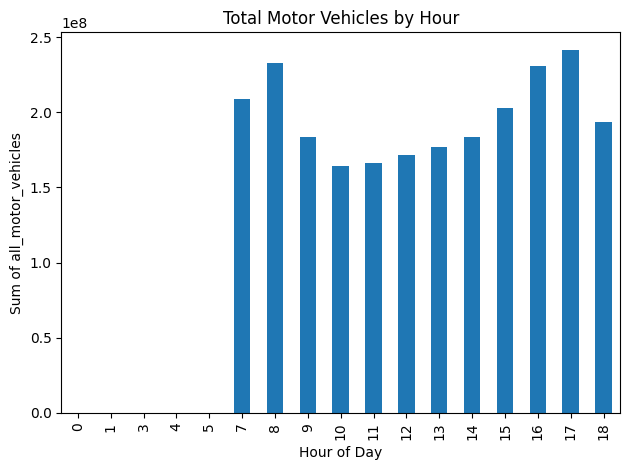

In [9]:
hourly = df_counts.groupby('hour')['all_motor_vehicles'].sum().sort_index()

plt.figure()
hourly.plot(kind='bar')
plt.title('Total Motor Vehicles by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Sum of all_motor_vehicles')
plt.tight_layout()
plt.show()

In [10]:
print(df_la.groupby('year')[['cars_and_taxis','all_motor_vehicles']].sum())
print(df_region.groupby('road_category_name')['all_motor_vehicles'].sum())

      cars_and_taxis  all_motor_vehicles
year                                    
1993    2.100849e+11        2.562140e+11
1994    2.143886e+11        2.619327e+11
1995    2.181758e+11        2.670168e+11
1996    2.236457e+11        2.741010e+11
1997    2.272964e+11        2.798186e+11
1998    2.302792e+11        2.848931e+11
1999    2.345330e+11        2.901553e+11
2000    2.336574e+11        2.896632e+11
2001    2.368867e+11        2.936785e+11
2002    2.426824e+11        3.005634e+11
2003    2.423140e+11        3.023994e+11
2004    2.449631e+11        3.069249e+11
2005    2.439972e+11        3.068776e+11
2006    2.469057e+11        3.113579e+11
2007    2.472724e+11        3.140652e+11
2008    2.454109e+11        3.110375e+11
2009    2.447908e+11        3.080917e+11
2010    2.418658e+11        3.057598e+11
2011    2.443111e+11        3.082318e+11
2012    2.454984e+11        3.090282e+11
2013    2.466425e+11        3.118999e+11
2014    2.535373e+11        3.221847e+11
2015    2.581128

In [ ]:
df_counts.head()

**2. Merge CSV**

In [11]:
merged = df_counts.merge(
    df_la[[
        'local_authority_id',
        'year',                
        'cars_and_taxis',
        'all_motor_vehicles'
    ]],
    on=['local_authority_id','year'],
    how='left',
    suffixes=('','_la')
)

merged = merged.merge(
    df_region[[
        'region_id',
        'year',
        'all_motor_vehicles'
    ]],
    on=['region_id','year'],
    how='left',
    suffixes=('','_reg')
)


In [12]:
merged.to_csv('merged_traffic.csv', index=False)

In [13]:
merged.drop(
    columns=['count_point_id','region_id','local_authority_id','road_category_id'],
    inplace=True,
    errors='ignore'
)

**3. ED Post-Merge**

*3.1 Missingness & Konsistensi*

In [14]:
miss_pct = merged.isna().mean().sort_values(ascending=False)
print(miss_pct)

start_junction_road_name        5.512137e-01
end_junction_road_name          5.512108e-01
link_length_miles               5.508174e-01
link_length_km                  5.508174e-01
all_motor_vehicles_la           8.490167e-04
cars_and_taxis_la               8.490167e-04
all_motor_vehicles              3.455301e-06
all_hgvs                        1.974457e-06
buses_and_coaches               1.234036e-06
hgvs_2_rigid_axle               8.638251e-07
hgvs_4_or_more_rigid_axle       4.524798e-07
cars_and_taxis                  2.468072e-07
hgvs_3_rigid_axle               2.468072e-07
hgvs_3_or_4_articulated_axle    2.468072e-07
hgvs_6_articulated_axle         1.645381e-07
direction_of_travel             0.000000e+00
latitude                        0.000000e+00
longitude                       0.000000e+00
easting                         0.000000e+00
northing                        0.000000e+00
region_name                     0.000000e+00
local_authority_name            0.000000e+00
road_name 

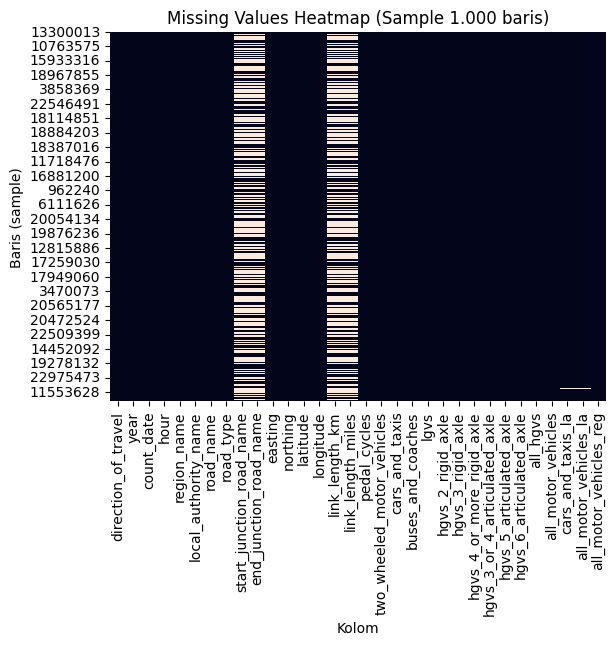

In [15]:
sample_missing = merged.isna().sample(n=1000, random_state=42)
plt.figure()
sns.heatmap(sample_missing, cbar=False)
plt.title('Missing Values Heatmap (Sample 1.000 baris)')
plt.xlabel('Kolom')
plt.ylabel('Baris (sample)')
plt.show()

*3.2 Statistik Per Kategori*

In [16]:
print(
  merged.groupby('region_name')['all_motor_vehicles']
        .agg(['mean','median','std'])
)

print(
  merged.groupby('local_authority_name')['all_motor_vehicles']
        .agg(['mean','median','std'])
)

                                mean  median         std
region_name                                             
East Midlands             507.481910   222.0  739.029134
East of England           512.729490   195.0  798.737585
London                    716.381379   455.0  893.342052
North East                518.765580   239.0  731.891339
North West                637.067483   315.0  975.979952
Scotland                  363.100640   155.0  601.558338
South East                612.582455   254.0  966.774794
South West                421.399345   190.0  619.372029
Wales                     405.966671   151.0  639.971645
West Midlands             536.652100   251.0  803.128517
Yorkshire and The Humber  543.767600   243.0  811.550930
                            mean  median          std
local_authority_name                                 
Aberdeen City         449.899051   348.0   403.114333
Aberdeenshire         155.316850    75.0   237.545511
Angus                 170.072781    60.0   

*3.3 Korelasi Antar Fitur*

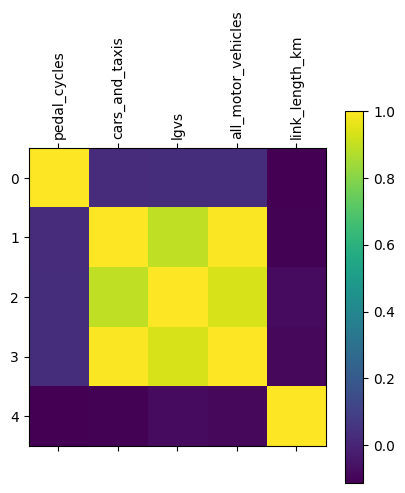

In [17]:
corr = merged[
  ['pedal_cycles','cars_and_taxis','lgvs',
   'all_motor_vehicles','link_length_km']
].corr()
plt.matshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.show()

*3.4 Analisis Waktu (Time‑Series)*

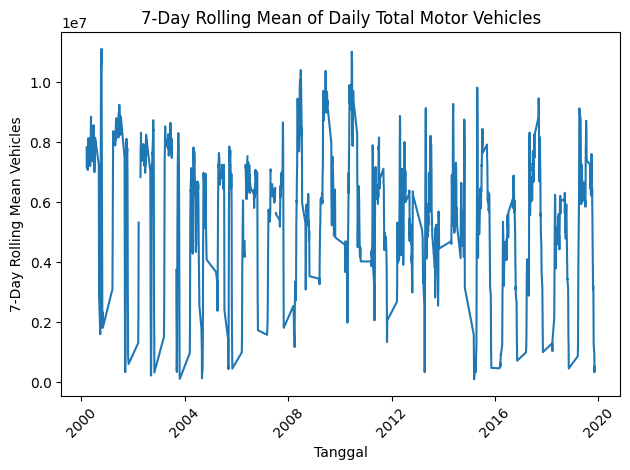

In [23]:
# Rolling mean (7-hari) dengan manual loop low-memory:
dates = list(daily.index)
values = list(daily.values)
window = 7
rolling_vals = []
for i in range(len(values)):
    start = max(0, i - window + 1)
    window_avg = sum(values[start:i+1]) / (i - start + 1)
    rolling_vals.append(window_avg)

# Buat Series baru
daily_rolling = pd.Series(rolling_vals, index=dates)

plt.figure()
plt.plot(daily_rolling.index, daily_rolling.values)
plt.title('7-Day Rolling Mean of Daily Total Motor Vehicles')
plt.xlabel('Tanggal')
plt.ylabel('7-Day Rolling Mean Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

le7 = 10⁷
contoh: 0.2e7 = 0.2 × 10⁷ = 2.000.000

*3.5 Ruas vs Volume*

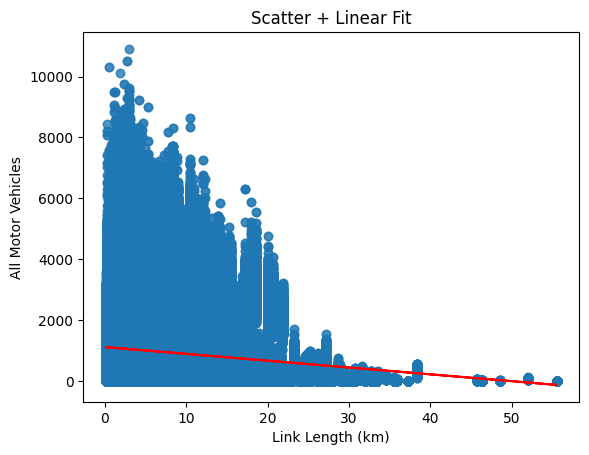

In [33]:
# Bersihkan data dari NaN dan Inf
df = merged[['link_length_km', 'all_motor_vehicles']].replace([np.inf, -np.inf], np.nan).dropna()

plt.scatter(
  df['link_length_km'], df['all_motor_vehicles'], alpha=0.3
)
m, b = np.polyfit(
  df['link_length_km'], df['all_motor_vehicles'], 1
)
plt.plot(
  df['link_length_km'], m * df['link_length_km'] + b,
  color='red'
)
plt.xlabel('Link Length (km)')
plt.ylabel('All Motor Vehicles')
plt.title('Scatter + Linear Fit')
plt.show()

*3.6 Heatmap Spasial*

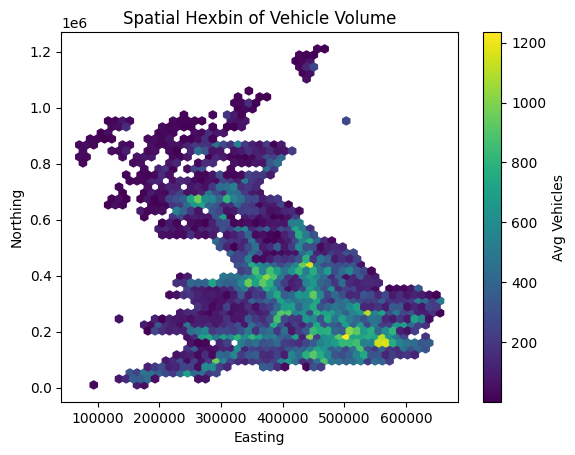

In [34]:
plt.hexbin(
  merged.easting, merged.northing,
  C=merged.all_motor_vehicles,
  gridsize=50, reduce_C_function=np.mean
)
plt.colorbar(label='Avg Vehicles')
plt.title('Spatial Hexbin of Vehicle Volume')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.show()


le6 = 10⁶
contoh: 0.2e6 = 0.2 × 10⁶ = 200.000

*3.7 Deteksi Outlier*

In [35]:
z = np.abs(
  stats.zscore(
    merged[['all_motor_vehicles','link_length_km']].dropna()
  )
)
outliers = (z > 3).any(axis=1)
print('Jumlah outlier:', outliers.sum())

Jumlah outlier: 493930


*3.8 Clustering*

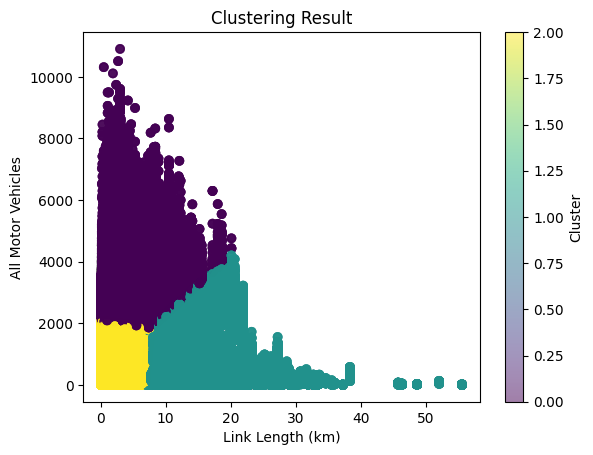

In [36]:
features = merged[['all_motor_vehicles', 'link_length_km']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
merged.loc[features.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi cluster
plt.scatter(
    features['link_length_km'], features['all_motor_vehicles'],
    c=merged.loc[features.index, 'cluster'], cmap='viridis', alpha=0.5
)
plt.xlabel('Link Length (km)')
plt.ylabel('All Motor Vehicles')
plt.title('Clustering Result')
plt.colorbar(label='Cluster')
plt.show()

**4. Feature‑Engineering**

*4.1 Kepadatan Kendaraan*

In [37]:
merged['kepadatan_kendaraan'] = (
  merged['all_motor_vehicles'] / merged['link_length_km']
)

*4.2 Label Klasifikasi (terciles):*

In [38]:
merged['traffic_label'] = pd.qcut(
  merged['kepadatan_kendaraan'],
  3,
  labels=['low','medium','high']
)

**Validasi & Output**

In [39]:
merged.head()
merged['traffic_label'].value_counts()

traffic_label
medium    3642636
low       3639947
high      3637235
Name: count, dtype: int64

In [40]:
merged.to_csv('merged_traffic.csv', index=False)